<p style="text-align:right"><img  src="https://postmba.org/www/wp-content/uploads/2021/10/PostMBA-logo.png" width="150" alt="regression"></p>


<p style="text-align:center"><img  src="utils/images/timeseries.png" width="500" alt="regression"></p>


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;align:left">
<font face="Arial" size=3><b>
Created by :
Hosein Ahmadi</b>
</font>
</p>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- series 1

<p style="text-align:left"><img  src="utils/images/Bilinear_eq1.png" width="550" alt="regression"></p>


- series 2

<p style="text-align:left"><img  src="utils/images/Bilinear_eq2.png" width="550" alt="regression"></p>


In [84]:
class Bilinear:
    """main class for create 
    time series on above models
    """
        
    def __init__(self, c:float, p:int, q:int, s:int, m:int, T:int):
        self.c = c
        self.p = p
        self.q = q
        self.s = s
        self.m = m
        self.T = T
        self.white_noise = np.random.normal(0, 1, T)
        self.phi_vector = np.random.random(p)
        self.tetha_vector = np.random.random(q)
    
    def create_series1(self, initialX=None):
        """return series on first equation
        """
        self.X = np.zeros(self.T) + self.c + self.white_noise
        if initialX:
            self.X[:len(initialX)] = initialX
        self.beta_array = np.random.rand(self.m, self.s)
        
        for t in range(self.p+1, self.T):
            self.X[t] += (np.dot(self.phi_vector, self.white_noise[t-self.p:t]) 
                         + (np.dot(self.tetha_vector, self.X[t-self.q:t])))
            
            for m_counter in range(1, self.m+1):
                self.X[t] += np.dot(
                    np.dot(self.beta_array[m_counter-1, :], self.white_noise[t-self.s:t].reshape(-1, 1)),
                    np.array(self.X[t-m_counter]))
            
        return self.X
    
    def create_series2(self, mu:int, initialX=None):
        """return series on second equation
        """
        self.beta_array = np.random.rand(self.s)
        self.X = np.zeros(self.T) + mu + self.white_noise
        if initialX:
            self.X[:len(initialX)] = initialX
        for t in range(self.s+1, self.T):
                self.X[t] += np.dot(np.dot(self.beta_array, self.white_noise[t-self.s:t].reshape(-1, 1)),
                                    np.array(self.white_noise[t]))
        
        return self.X
            
                
    def plot(self):
        """plot the last created series on the object
        """
        plt.figure(figsize=(10, 5))
        plt.plot(self.X, color = 'red')
        plt.axhline(0, color = 'black')
        plt.show()

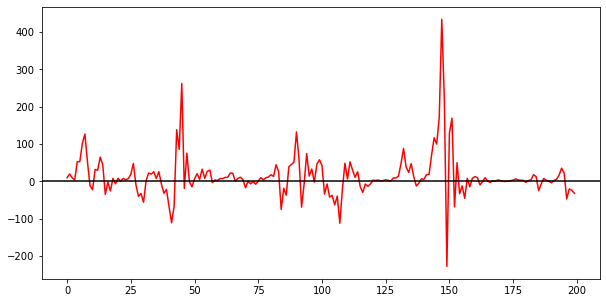

In [85]:
model = Bilinear(c = 2, p = 3, q = 2, m = 2, s = 2, T = 200)
model.create_series1(initialX = [10, 20, 10])
model.plot()

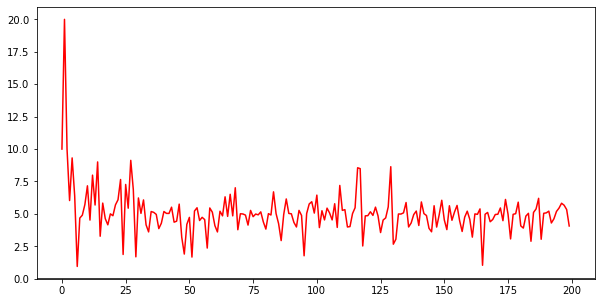

In [86]:
model = Bilinear(c = 2, p = 3, q = 2, m = 2, s = 2, T = 200)
model.create_series2(mu = 5, initialX = [10, 20, 10])
model.plot()